In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load dataset
file_path = r"C:\Users\ASHISH\Downloads\Employee_Salaries.csv"
df = pd.read_csv(file_path)

Data Loading and Inspections

In [6]:
import pandas as pd

# Step 1: Data Loading & Inspection
# Load the data from the CSV file
df = pd.read_csv('Employee_Salaries.csv')

# Basic inspection
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nMissing values:")
print(df.isna().sum())

print("\nDescriptive statistics:")
print(df.describe())

print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} unique values")

First 5 rows:
  Department            Department_Name                        Division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   

  Gender  Base_Salary  Overtime_Pay  Longevity_Pay Grade  
0      M   175873.000          0.00            0.0    M2  
1      M   145613.360          0.00            0.0    M3  
2      F   136970.000          0.00            0.0    M3  
3      F    89432.694          0.00         2490.0    21  
4      F    78947.000        456.68         6257.7    16  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------ 

Data Cleaning with numpy/pandas

In [7]:

# Convert relevant columns to numeric
numeric_columns = ['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Replace missing values in numerical columns with the median
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    df[col] = df[col].fillna(np.nanmedian(df[col]))

# Drop rows with critical missing values (like Employee Name if present, or Base_Salary)
df.dropna(subset=['Base_Salary'], inplace=True)

# Check cleaned data
df.info()
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Department       10291 non-null  object 
 1   Department_Name  10291 non-null  object 
 2   Division         10291 non-null  object 
 3   Gender           10291 non-null  object 
 4   Base_Salary      10291 non-null  float64
 5   Overtime_Pay     10291 non-null  float64
 6   Longevity_Pay    10291 non-null  float64
 7   Grade            10258 non-null  object 
dtypes: float64(3), object(5)
memory usage: 643.3+ KB
  Department            Department_Name                        Division  \
0        ABS  Alcohol Beverage Services           ABS 85 Administration   
1        ABS  Alcohol Beverage Services           ABS 85 Administration   
2        ABS  Alcohol Beverage Services           ABS 85 Administration   
3        ABS  Alcohol Beverage Services  ABS 85 Administrative Services   
4  

Data Analysis Operations

Basic Analysis (Numpy and Pandas)

In [8]:
# Convert salary-related columns to numeric
salary_cols = ['Base_Salary', 'Overtime_Pay', 'Longevity_Pay']
for col in salary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows where Base_Salary is missing
df.dropna(subset=['Base_Salary'], inplace=True)

# Extract salary data as NumPy array
salary_data = df[salary_cols].values

# Perform basic analysis
print("Array shape:", salary_data.shape)
print("Data type:", salary_data.dtype)
print("Total Base Salary (in $):", np.sum(salary_data[:, 0]))
print("Total Overtime Pay (in $):", np.sum(salary_data[:, 1]))
print("Total Longevity Pay (in $):", np.sum(salary_data[:, 2]))
print("Average Total Compensation per Employee (in $):", 
      np.mean(np.sum(salary_data, axis=1)))


Array shape: (10291, 3)
Data type: float64
Total Base Salary (in $): 929402497.6736
Total Overtime Pay (in $): 83164544.63
Total Longevity Pay (in $): 15785188.060000002
Average Total Compensation per Employee (in $): 99927.33751468273


Array slicing examples

In [9]:
# Array slicing
base_salaries = salary_data[:, 0]  # All Base_Salary values
first_5_overtime = salary_data[:5, 1]  # First 5 Overtime_Pay values

# Print results
print("Base Salary (first 5 values):", base_salaries[:5])
print("First 5 Overtime Pay values:", first_5_overtime)


Base Salary (first 5 values): [175873.    145613.36  136970.     89432.694  78947.   ]
First 5 Overtime Pay values: [  0.     0.     0.     0.   456.68]


Universal functions

In [10]:
# Normalize salary data column-wise
normalized_salary = salary_data / np.max(salary_data, axis=0)
print("\nNormalized Salary Data (first 5 rows):")
print(normalized_salary[:5])

# Round salary data to 1 decimal place
rounded_salary = np.round(salary_data[:5], 1)
print("\nRounded Salary Data (1 decimal):")
print(rounded_salary)


Normalized Salary Data (first 5 rows):
[[0.60230479 0.         0.        ]
 [0.49867589 0.         0.        ]
 [0.46907534 0.         0.        ]
 [0.30627635 0.         0.12278433]
 [0.27036644 0.00200801 0.30857331]]

Rounded Salary Data (1 decimal):
[[175873.       0.       0. ]
 [145613.4      0.       0. ]
 [136970.       0.       0. ]
 [ 89432.7      0.    2490. ]
 [ 78947.     456.7   6257.7]]


Aggregations


In [11]:
print("\nMean salary components:")
print("Base Salary:", np.round(df['Base_Salary'].mean(), 2),
      "\nOvertime Pay:", np.round(df['Overtime_Pay'].mean(), 2),
      "\nLongevity Pay:", np.round(df['Longevity_Pay'].mean(), 2))



Mean salary components:
Base Salary: 90312.17 
Overtime Pay: 8081.29 
Longevity Pay: 1533.88


Broadcasting

In [12]:
# Assign weights to salary components
salary_weights = np.array([0.7, 0.2, 0.1])  # Example weights for Base, Overtime, Longevity
weighted_salary = salary_data * salary_weights

print("\nSalary weights:", salary_weights)
print("First 5 rows of original salary data:\n", salary_data[:5])
print("First 5 rows of weighted salary data:\n", weighted_salary[:5])



Salary weights: [0.7 0.2 0.1]
First 5 rows of original salary data:
 [[175873.         0.         0.   ]
 [145613.36       0.         0.   ]
 [136970.         0.         0.   ]
 [ 89432.694      0.      2490.   ]
 [ 78947.       456.68    6257.7  ]]
First 5 rows of weighted salary data:
 [[1.23111100e+05 0.00000000e+00 0.00000000e+00]
 [1.01929352e+05 0.00000000e+00 0.00000000e+00]
 [9.58790000e+04 0.00000000e+00 0.00000000e+00]
 [6.26028858e+04 0.00000000e+00 2.49000000e+02]
 [5.52629000e+04 9.13360000e+01 6.25770000e+02]]


Boolean masking

In [13]:
high_salary_mask = df['Base_Salary'] > 100000
high_earners = df[high_salary_mask]

# Display a sample of high earners
print("\nHigh Base Salary Employees (>$100,000):")
print(high_earners[['Department', 'Gender', 'Base_Salary']].sample(5))



High Base Salary Employees (>$100,000):
     Department Gender  Base_Salary
9151        POL      M    108084.00
9457        POL      M    153783.21
8489        POL      F    124833.00
6301        HHS      F    112267.00
1364        COR      M    117424.00



Sorting with argsort

In [15]:
sorted_indices = np.argsort(salary_data[:, 0])[::-1]  # Descending Base_Salary
top_earners = df.iloc[sorted_indices[:10]]

print("Top 10 Employees by Base Salary:")
print(top_earners[['Department', 'Gender', 'Base_Salary']])


Top 10 Employees by Base Salary:
     Department Gender  Base_Salary
821         CEX      M    292000.00
8509        POL      M    258000.00
502         CAT      M    258000.00
579         CCL      F    246162.47
1677        DGS      M    246000.00
2049        DOT      M    244000.00
6073        HHS      M    240000.00
3582        FIN      M    236000.00
174         ABS      F    236000.00
9718        PRO      M    236000.00



Structured Array

In [16]:
filtered_df = df[['Department', 'Division', 'Base_Salary']].dropna()

dtype = [('department', 'U50'), ('division', 'U50'), ('base_salary', 'f4')]

structured_array = np.array(
    list(zip(
        filtered_df['Department'],
        filtered_df['Division'],
        filtered_df['Base_Salary']
    )),
    dtype=dtype
)

print("Structured Array Sample (First 5 Entries):")
print(structured_array[:5])


Structured Array Sample (First 5 Entries):
[('ABS', 'ABS 85 Administration', 175873.   )
 ('ABS', 'ABS 85 Administration', 145613.36 )
 ('ABS', 'ABS 85 Administration', 136970.   )
 ('ABS', 'ABS 85 Administrative Services',  89432.695)
 ('ABS', 'ABS 85 Administrative Services',  78947.   )]


Partial Sorting

In [17]:
top_5_ot_indices = np.argpartition(salary_data[:, 1], -5)[-5:]
top_5_overtime = df.iloc[top_5_ot_indices].sort_values('Overtime_Pay', ascending=False)

print("Top 5 Employees by Overtime Pay (Partial Sort):")
print(top_5_overtime[['Department', 'Gender', 'Overtime_Pay']])


Top 5 Employees by Overtime Pay (Partial Sort):
     Department Gender  Overtime_Pay
4455        FRS      M     227428.99
4574        FRS      M     223998.01
5018        FRS      M     187422.58
1241        COR      M     177216.03
5020        FRS      M     176443.34


Hierarchical Indexing (Using Department + Division)

In [31]:
multi_index_df = df.set_index(['Department', 'Division'])

print("=== Hierarchical Index DataFrame (First 10 Rows) ===")
print(multi_index_df[['Base_Salary']].head(10))


=== Hierarchical Index DataFrame (First 10 Rows) ===
                                           Base_Salary
Department Division                                   
ABS        ABS 85 Administration           175873.0000
           ABS 85 Administration           145613.3600
           ABS 85 Administration           136970.0000
           ABS 85 Administrative Services   89432.6940
           ABS 85 Administrative Services   78947.0000
           ABS 85 Administrative Services   98228.0000
           ABS 85 Administrative Services   82405.3864
           ABS 85 Administrative Services   93986.0000
           ABS 85 Administrative Services  149464.1500
           ABS 85 Administrative Services  117424.0000


 Creating a New Column – “Total_Pay”

In [18]:
df['Total_Pay'] = df['Base_Salary'] + df['Overtime_Pay'] * 1.25 + df['Longevity_Pay'] * 1.1

print("\nTop 10 Employees by Total Pay:")
print(df.sort_values('Total_Pay', ascending=False)[['Department', 'Gender', 'Base_Salary', 'Total_Pay']].head(10))



Top 10 Employees by Total Pay:
     Department Gender  Base_Salary    Total_Pay
4574        FRS      M     132119.0  427652.8245
4455        FRS      M     132119.0  426487.2435
5018        FRS      M     132119.0  381933.4930
3709        FRS      F     132119.0  351176.4680
3745        FRS      M     132119.0  349925.3750
4463        FRS      M     132119.0  345376.9375
8643        POL      M     124833.0  341220.5075
3948        FRS      M     132119.0  335798.1180
5020        FRS      M     106504.0  330593.5970
1241        COR      M      95927.0  322915.9185


 Concatenation Along Rows – Add a New Employee

In [19]:
new_employee = {
    'Department': 'HR',
    'Department_Name': 'Human Resources',
    'Division': 'HR Admin',
    'Gender': 'F',
    'Base_Salary': 102000,
    'Overtime_Pay': 1500,
    'Longevity_Pay': 3500,
    'Grade': 'N20'
}

new_emp_df = pd.DataFrame([new_employee])
df_appended = pd.concat([df, new_emp_df], ignore_index=True)

print("\nNew Employee Added:")
print(df_appended.tail(2))


New Employee Added:
      Department                               Department_Name  \
10290        ZAH  Office of Zoning and Administrative Hearings   
10291         HR                               Human Resources   

                                        Division Gender  Base_Salary  \
10290  ZAH 05 Zoning and Administrative Hearings      F    177976.31   
10291                                   HR Admin      F    102000.00   

       Overtime_Pay  Longevity_Pay Grade  Total_Pay  
10290           0.0            0.0   N35  177976.31  
10291        1500.0         3500.0   N20        NaN  


 Concatenation Along Columns 

In [20]:
extra_info = pd.DataFrame({
    'Employee_ID': range(1, len(df) + 1),
    'Annual_Bonus': [np.random.randint(1000, 10000) for _ in range(len(df))]
})

df_with_extra_info = pd.concat([df, extra_info], axis=1)
print("\nData with Extra Info (First 3 Rows):")
print(df_with_extra_info[['Department', 'Employee_ID', 'Annual_Bonus']].head(3))



Data with Extra Info (First 3 Rows):
  Department  Employee_ID  Annual_Bonus
0        ABS            1          3924
1        ABS            2          5838
2        ABS            3          9369


 Merging – Join with Department Location Info

In [21]:
dept_location = pd.DataFrame({
    'Department': ['ABS', 'HR', 'IT', 'Finance'],
    'Location': ['Rockville', 'Bethesda', 'Silver Spring', 'Gaithersburg']
})

# Inner join
df_inner_merged = pd.merge(df, dept_location, on='Department', how='inner')
print("\nInner Join Sample:")
print(df_inner_merged[['Department', 'Division', 'Location']].tail(3))

# Left join
df_left_merged = pd.merge(df, dept_location, on='Department', how='left')
print("\nLeft Join Sample:")
print(df_left_merged[['Department', 'Division', 'Location']].tail(3))



Inner Join Sample:
    Department                         Division   Location
459        ABS  ABS 85 Beer Delivery Operations  Rockville
460        ABS  ABS 85 Beer Delivery Operations  Rockville
461        ABS  ABS 85 Beer Delivery Operations  Rockville

Left Join Sample:
      Department                                           Division Location
10288        ZAH  ZAH 05 Office of Zoning and Administrative Hea...      NaN
10289        ZAH          ZAH 05 Zoning and Administrative Hearings      NaN
10290        ZAH          ZAH 05 Zoning and Administrative Hearings      NaN


 Right Join (All departments, only matching employees)

In [36]:
df_right_join = pd.merge(df, dept_location, on='Department', how='right')
print("\nRight Join Sample:")
print(df_right_join[['Department', 'Division', 'Location']].tail(3))



Right Join Sample:
    Department Division       Location
462         HR      NaN       Bethesda
463         IT      NaN  Silver Spring
464    Finance      NaN   Gaithersburg


Full Outer Join (All employees and departments, even if unmatched)

In [37]:
df_outer_join = pd.merge(df, dept_location, on='Department', how='outer')
print("\nFull Outer Join Sample:")
print(df_outer_join[['Department', 'Division', 'Location']].tail(3))



Full Outer Join Sample:
      Department                                           Division Location
10291        ZAH  ZAH 05 Office of Zoning and Administrative Hea...      NaN
10292        ZAH          ZAH 05 Zoning and Administrative Hearings      NaN
10293        ZAH          ZAH 05 Zoning and Administrative Hearings      NaN


Aggregation

In [43]:
# Total Base Salary by Department
dept_salary = df.groupby('Department')['Base_Salary'].sum()
print(dept_salary.head(10))

#Total Base Salary by Gender
gender_salary = df.groupby('Gender')['Base_Salary'].sum()
print(gender_salary)


Department
ABS    2.996219e+07
BOA    3.134476e+05
BOE    2.907583e+06
CAT    1.011511e+07
CCL    1.385385e+07
CEC    8.165235e+06
CEX    6.140147e+06
COR    4.358457e+07
CUS    2.745334e+06
DEP    1.935923e+07
Name: Base_Salary, dtype: float64
Gender
F    3.816641e+08
M    5.477384e+08
Name: Base_Salary, dtype: float64


Group by

In [44]:
gender_salary = df.groupby('Gender')['Base_Salary'].sum().sort_values(ascending=False)
gender_salary.head()

Gender
M    5.477384e+08
F    3.816641e+08
Name: Base_Salary, dtype: float64

In [48]:
highest_grades = df.groupby('Grade')['Base_Salary'].max().sort_values(ascending=False)
highest_grades

Grade
EX0    292000.0000
EX1    258000.0000
MD4    233329.0000
EX2    218000.0000
MD3    212664.0000
          ...     
P4P     54042.0000
5       50421.0000
F3P     48413.0000
7       46337.0000
N5      34684.2042
Name: Base_Salary, Length: 98, dtype: float64


Pivot Tables

Pivot Table 1: Average Base Salary by Department and Grade

In [50]:
pivot1 = pd.pivot_table(df, 
                        index='Department_Name', 
                        columns='Grade', 
                        values='Base_Salary', 
                        aggfunc='mean',
                        fill_value=0)
pivot1.head(5)

Grade,10,11,12,13,14,15,16,17,18,19,...,P1,P2,P3,P4,P4P,P5,S1,T1,T1P,T2
Department_Name,,,,,,,,,,,,,,,,,,,,,
Alcohol Beverage Services,51957.047055,0.0,38982.816606,60907.053383,63748.254783,65218.777082,72511.765033,0.0,86352.821978,89948.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Board of Appeals Department,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Board of Elections,64693.000000,0.0,52427.380000,0.000000,0.000000,0.000000,67350.970671,0.0,0.000000,70927.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Community Engagement Cluster,58088.284805,0.0,0.000000,51831.041533,0.000000,0.000000,66550.595850,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Community Use of Public Facilities,0.000000,0.0,0.000000,22639.000000,64136.846700,0.000000,65575.165000,0.0,75435.264164,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Pivot Table 2: Multiple Aggregations of Base Salary by Department and Grade

In [52]:
pivot2 = pd.pivot_table(df,
                        index='Department_Name',
                        columns='Grade',
                        values='Base_Salary',
                        aggfunc=['mean', 'max', 'sum'],
                        fill_value=0)
pivot2.head(5)

mean                     \
Grade                                         10   11            12   
Department_Name                                                       
Alcohol Beverage Services           51957.047055  0.0  38982.816606   
Board of Appeals Department             0.000000  0.0      0.000000   
Board of Elections                  64693.000000  0.0  52427.380000   
Community Engagement Cluster        58088.284805  0.0      0.000000   
Community Use of Public Facilities      0.000000  0.0      0.000000   

                                                                              \
Grade                                         13            14            15   
Department_Name                                                                
Alcohol Beverage Services           60907.053383  63748.254783  65218.777082   
Board of Appeals Department             0.000000      0.000000      0.000000   
Board of Elections                      0.000000      0.000000      0.000000   
Community Engagement Cluster        51831.041533      0.000000      0.000000   
Community Use of Public Facilities  22639.000000  64136.846700      0.000000   

                                                                              \
Grade                                         16   17            18       19   
Department_Name                                                                
Alcohol Beverage Services           72511.765033  0.0  86352.821978  89948.0   
Board of Appeals Department             0.000000  0.0      0.000000      0.0   
Board of Elections                  67350.970671  0.0      0.000000  70927.0   
Community Engagement Cluster        66550.595850  0.0      0.000000      0.0   
Community Use of Public Facilities  65575.165000  0.0  75435.264164      0.0   

                                    ...  sum                                \
Grade                               ...   P1   P2   P3   P4  P4P   P5   S1   
Department_Name                     ...                                      
Alcohol Beverage Services           ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Board of Appeals Department         ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Board of Elections                  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Community Engagement Cluster        ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Community Use of Public Facilities  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                                                   
Grade                                T1  T1P   T2  
Department_Name                                    
Alcohol Beverage Services           0.0  0.0  0.0  
Board of Appeals Department         0.0  0.0  0.0  
Board of Elections                  0.0  0.0  0.0  
Community Engagement Cluster        0.0  0.0  0.0  
Community Use of Public Facilities  0.0  0.0  0.0  

[5 rows x 294 columns]

Pivot Table 3: Average Base Salary and Overtime Pay by Department

In [22]:
pivot3 = pd.pivot_table(df,
                       index='Department_Name',
                       values=['Base_Salary', 'Overtime_Pay'],
                       aggfunc='mean')
pivot3

,Base_Salary,Overtime_Pay
Department_Name,,
Alcohol Beverage Services,64853.219839,2065.314632
Board of Appeals Department,104482.526933,138.250000
Board of Elections,85517.136856,325.637353
Community Engagement Cluster,77764.138270,4386.754381
Community Use of Public Facilities,91511.125830,472.315333
Correction and Rehabilitation,84960.180202,21778.238187
County Attorney's Office,129680.870360,23.036795
County Council,105754.565093,22.910687
Department of Environmental Protection,104644.466823,1648.874486


Data Visualization

Pie Chart


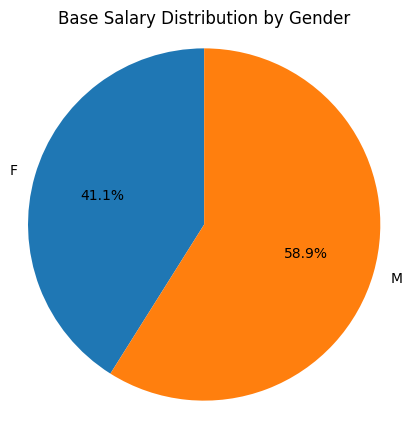

In [23]:
# Pie Chart
gender_salary = df.groupby("Gender")["Base_Salary"].sum()
plt.figure(figsize=(5, 5))
plt.pie(gender_salary, labels=gender_salary.index, autopct='%1.1f%%', startangle=90)
plt.title("Base Salary Distribution by Gender")
plt.axis('equal')
plt.show()

Bar Graph

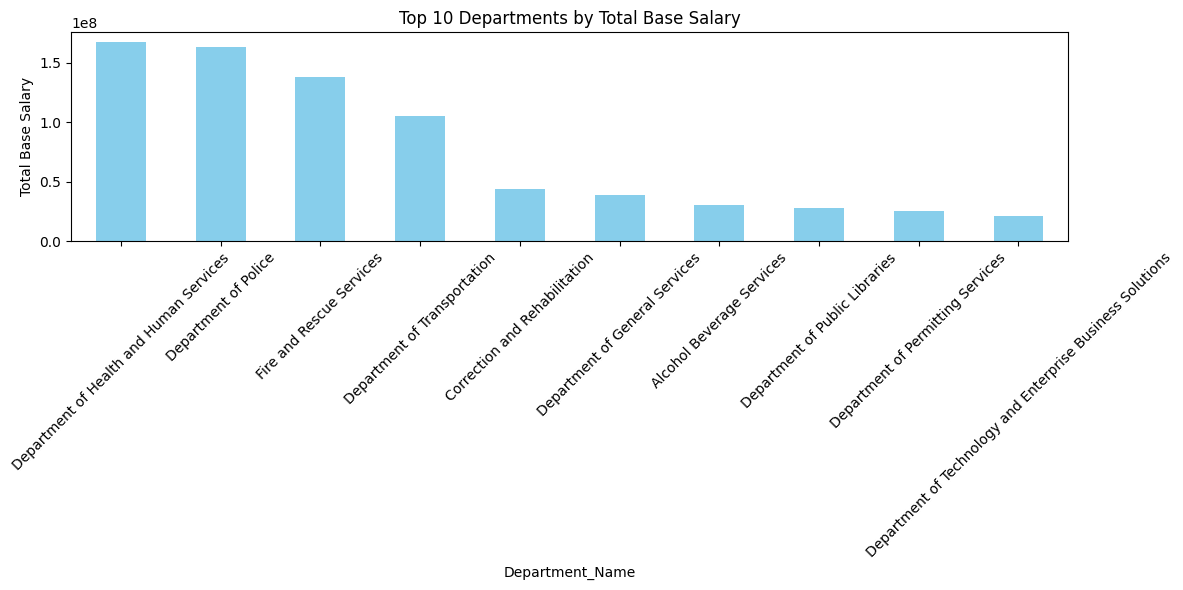

In [24]:
# Bar Graph
dept_salary = df.groupby("Department_Name")["Base_Salary"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
dept_salary.plot(kind='bar', color='skyblue')
plt.title("Top 10 Departments by Total Base Salary")
plt.ylabel("Total Base Salary")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Line Plot

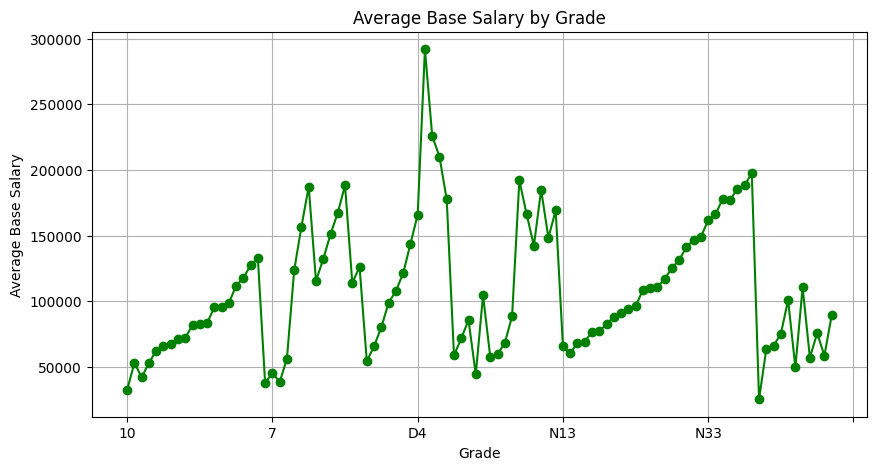

In [25]:
# Line Plot
grade_salary = df.groupby("Grade")["Base_Salary"].mean().sort_index()
plt.figure(figsize=(10, 5))
grade_salary.plot(kind='line', marker='o', color='green')
plt.title("Average Base Salary by Grade")
plt.xlabel("Grade")
plt.ylabel("Average Base Salary")
plt.grid(True)
plt.show()

Scatter Plot

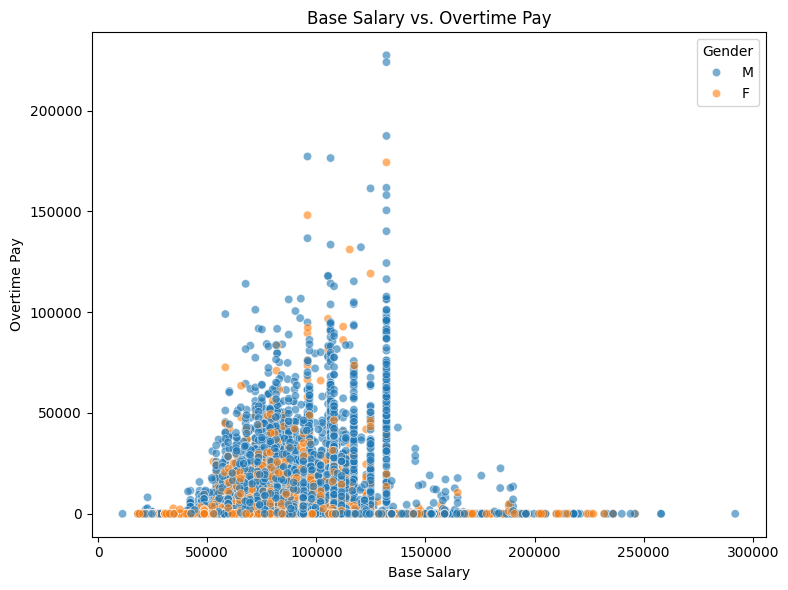

In [26]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Base_Salary", y="Overtime_Pay", hue="Gender", alpha=0.6)
plt.title("Base Salary vs. Overtime Pay")
plt.xlabel("Base Salary")
plt.ylabel("Overtime Pay")
plt.tight_layout()
plt.show()

Box Plot

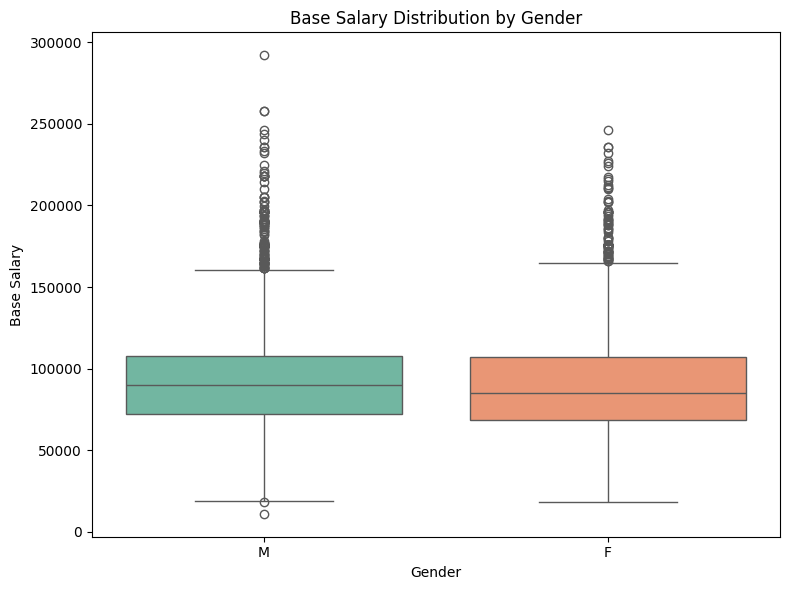

In [64]:
# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="Base_Salary", hue="Gender", palette="Set2", legend=False)
plt.title("Base Salary Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Base Salary")
plt.tight_layout()
plt.show()


Three-Dimensional Plotting with Matplotlib

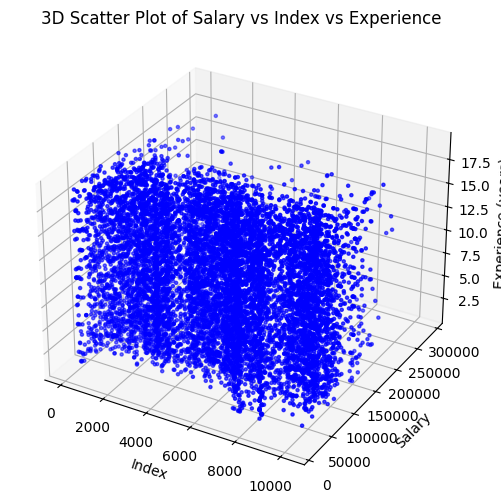

In [30]:
# 3D plot example using dummy salary data
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Using indexes as x, salary as y, and years of experience (simulated) as z
x = df.index
y = df['Base_Salary']
z = np.random.randint(1, 20, size=len(df))  # Simulated experience

ax.scatter(x, y, z, c='b', marker='.')
ax.set_xlabel('Index')
ax.set_ylabel('Salary')
ax.set_zlabel('Experience (years)')
plt.title("3D Scatter Plot of Salary vs Index vs Experience")
plt.show()

 Geographic Data with Basemap

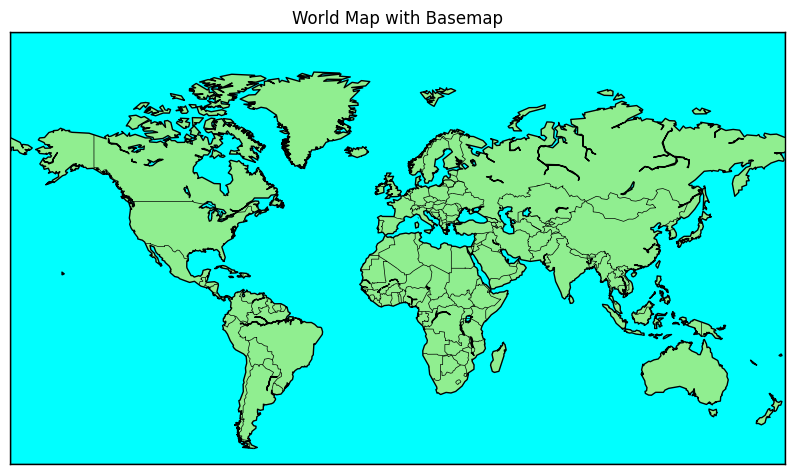

In [31]:
# Basemap installation might be required: !pip install basemap
# Sample world map plot
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(10, 6))
m = Basemap(projection='mill', llcrnrlat=-60, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, resolution='c')
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')
plt.title("World Map with Basemap")
plt.show()

 Inferential Statistics Examples

Normal, Poisson, and Bernoulli Distributions

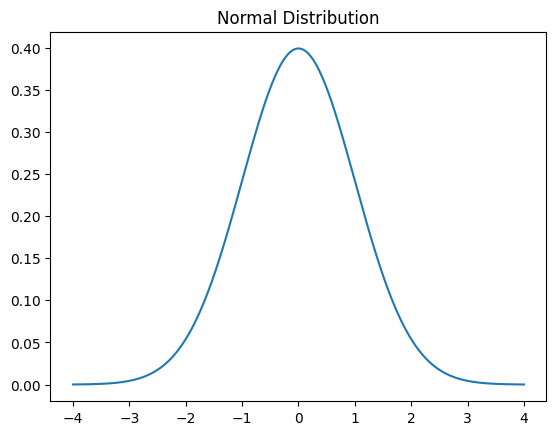

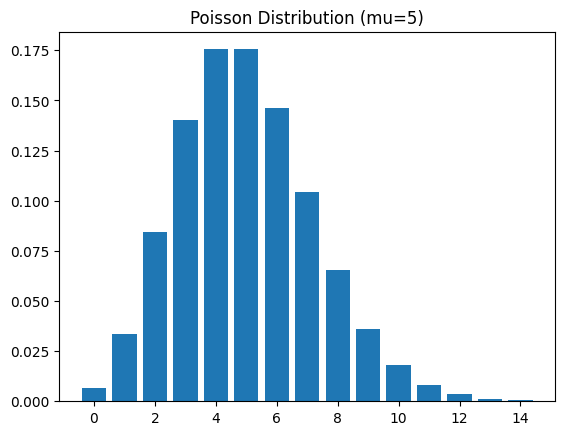

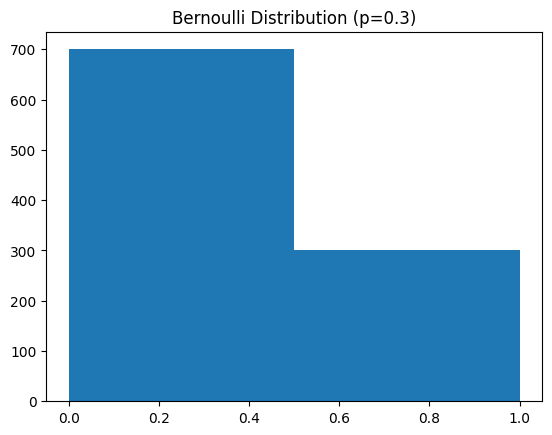

In [32]:
from scipy.stats import norm, poisson, bernoulli

# Normal distribution
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x))
plt.title("Normal Distribution")
plt.show()

# Poisson distribution
x = np.arange(0, 15)
plt.bar(x, poisson.pmf(x, mu=5))
plt.title("Poisson Distribution (mu=5)")
plt.show()

# Bernoulli distribution
data = bernoulli.rvs(p=0.3, size=1000)
plt.hist(data, bins=2)
plt.title("Bernoulli Distribution (p=0.3)")
plt.show()

 Z-score and P-value

In [35]:
from scipy.stats import zscore

df['Salary_zscore'] = zscore(df['Base_Salary'])
print(df[['Base_Salary', 'Salary_zscore']].head())

   Base_Salary  Salary_zscore
0   175873.000       2.738882
1   145613.360       1.770243
2   136970.000       1.493561
3    89432.694      -0.028153
4    78947.000      -0.363810


One-tailed vs Two-tailed Tests, Type I and Type II Errors

In [38]:
# Hypothetical test values
# Two-tailed: testing if mean salary is significantly different from 70000
sample_mean = df['Base_Salary'].mean()
population_mean = 70000
std_dev = df['Base_Salary'].std()
n = len(df)
z = (sample_mean - population_mean) / (std_dev / np.sqrt(n))

from scipy.stats import norm
p_two_tailed = 2 * (1 - norm.cdf(abs(z)))

print(f"Z-score: {z:.2f}, Two-tailed p-value: {p_two_tailed:.4f}")
# Type I Error: Rejecting a true null hypothesis
# Type II Error: Failing to reject a false null hypothesis

Z-score: 65.96, Two-tailed p-value: 0.0000


Confidence Interval

In [42]:
import scipy.stats as stats

mean_salary = df['Base_Salary'].mean()
sem = stats.sem(df['Base_Salary'])
ci = stats.t.interval(0.95, len(df['Base_Salary'])-1, loc=mean_salary, scale=sem)
print(f"95% Confidence Interval for Salary: {ci}")

95% Confidence Interval for Salary: (89708.50472561868, 90915.82676278865)


Correlation

In [44]:
# Assuming 'Benefits' is another column related to 'Salary'
if 'Benefits' in df.columns:
    corr = df['Base_Salary'].corr(df['Benefits'])
    print(f"Correlation between Salary and Benefits: {corr}")
else:
    print("Benefits column not found for correlation.")

Benefits column not found for correlation.


Z-test vs T-test

In [45]:
from scipy.stats import ttest_1samp

# One-sample T-test: test if sample mean equals 70000
t_stat, p_val = ttest_1samp(df['Base_Salary'], 70000)
print(f"T-test: t-statistic = {t_stat:.2f}, p-value = {p_val:.4f}")
# Z-test shown earlier using z-score

T-test: t-statistic = 65.96, p-value = 0.0000


F-distribution

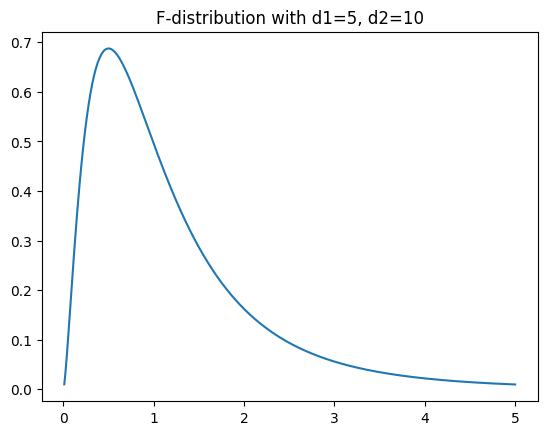

In [46]:
from scipy.stats import f

x = np.linspace(0.01, 5, 500)
d1, d2 = 5, 10
plt.plot(x, f.pdf(x, d1, d2))
plt.title("F-distribution with d1=5, d2=10")
plt.show()

 Chi-square Distribution and Test of Independence

In [47]:
from scipy.stats import chi2_contingency

# Simulated contingency table
contingency_table = pd.crosstab(index=np.random.choice(['Male', 'Female'], len(df)),
                                columns=np.random.choice(['High', 'Low'], len(df)))
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi2 statistic: {chi2}, p-value: {p}")
print("Contingency Table:")
print(contingency_table)

Chi-Square Test Results:
Chi2 statistic: 0.02910881289031031, p-value: 0.8645280358303368
Contingency Table:
col_0   High   Low
row_0             
Female  2528  2606
Male    2549  2608


ANOVA

In [49]:
# Simulated ANOVA across 3 random departments
df['Department'] = np.random.choice(['HR', 'IT', 'Finance'], size=len(df))
group1 = df[df['Department'] == 'HR']['Base_Salary']
group2 = df[df['Department'] == 'IT']['Base_Salary']
group3 = df[df['Department'] == 'Finance']['Base_Salary']

from scipy.stats import f_oneway
anova_result = f_oneway(group1, group2, group3)
print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

ANOVA F-statistic: 2.0275971414909995, p-value: 0.13170408672959866


Data Mining Example

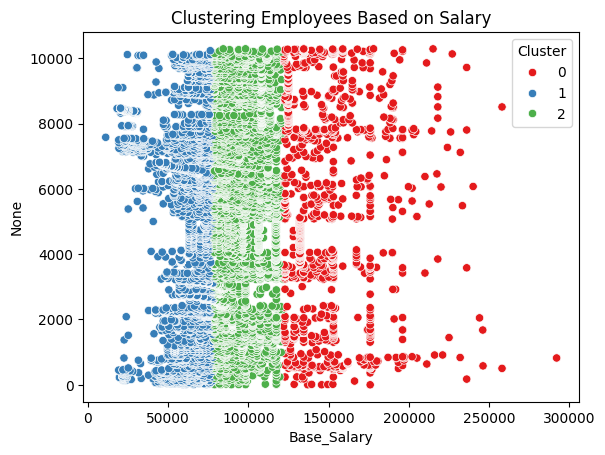

In [52]:
# Simple clustering using KMeans
from sklearn.cluster import KMeans

# We'll use Salary for clustering
X = df[['Base_Salary']].dropna()
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df['Cluster'] = kmeans.labels_

sns.scatterplot(data=df, x='Base_Salary', y=df.index, hue='Cluster', palette='Set1')
plt.title("Clustering Employees Based on Salary")
plt.show()